In [2]:
import pandas as pd
import os
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
Movies = pd.read_csv("C:\\Users\\697299\\Documents\\Jignesh\\Data Analysis\\Python\\Udemy_Python_SDS_AtoZ\\P4-Movie-Ratings.csv")

In [4]:
Movies.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [5]:
Movies.columns = ['Film', 'Genre', 'CriticRating', 'AudienceRating',
       'BudgetMillion', 'Year']

In [12]:
Movies.head()

,Film,Genre,CriticRating,AudienceRating,BudgetMillion,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [15]:
Movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Film            559 non-null    object
 1   Genre           559 non-null    object
 2   CriticRating    559 non-null    int64 
 3   AudienceRating  559 non-null    int64 
 4   BudgetMillion   559 non-null    int64 
 5   Year            559 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [17]:
Movies.describe()
# year is coming as number - we dont need it as Number
# Film is object, we change it to category

,CriticRating,AudienceRating,BudgetMillion,Year
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [18]:
Movies.Film = Movies.Film.astype('category')

In [19]:
Movies.Genre = Movies.Genre.astype('category')

In [20]:
Movies.Year = Movies.Year.astype('category')

In [22]:
#unique values in category
Movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [23]:
Movies.describe()
#as you see Year is not coming in describe now.

,CriticRating,AudienceRating,BudgetMillion
count,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136
std,26.413091,16.826887,48.731817
min,0.000000,0.000000,0.000000
25%,25.000000,47.000000,20.000000
50%,46.000000,58.000000,35.000000
75%,70.000000,72.000000,65.000000
max,97.000000,96.000000,300.000000


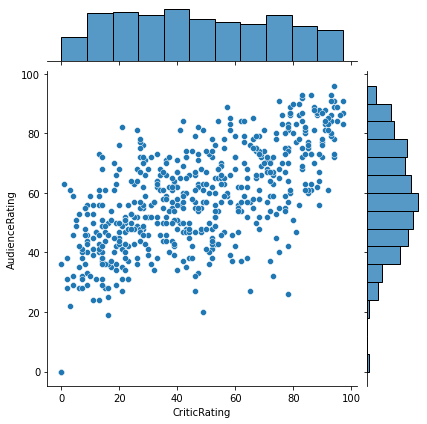

In [28]:
#Jointplots
j = sns.jointplot(data = Movies, x='CriticRating', y='AudienceRating')

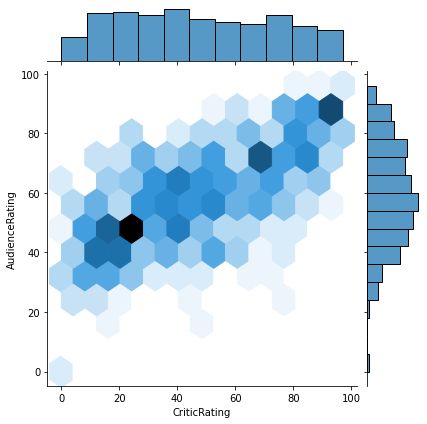

In [30]:
#Jointplots
j = sns.jointplot(data = Movies, x='CriticRating', y='AudienceRating', kind='hex')

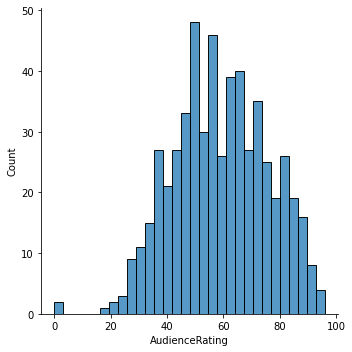

In [33]:
#already know this
m1 = sns.displot(Movies.AudienceRating, bins=30)

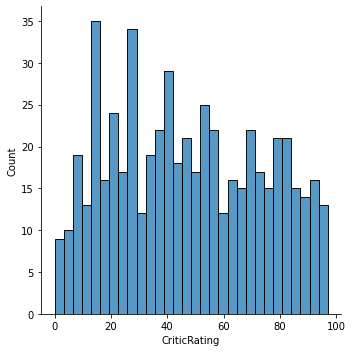

In [34]:
m1 = sns.displot(Movies.CriticRating, bins=30)

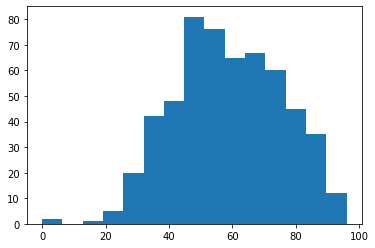

In [36]:

n1 = plt.hist(Movies.AudienceRating, bins=15)

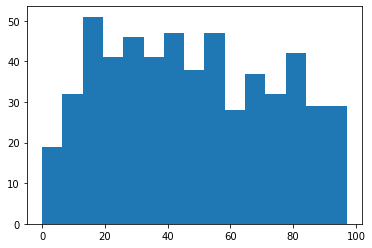

In [37]:
n2 = plt.hist(Movies.CriticRating, bins=15)

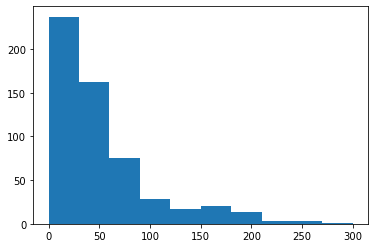

In [39]:
#Stacked histogram
h1 = plt.hist(Movies.BudgetMillion)

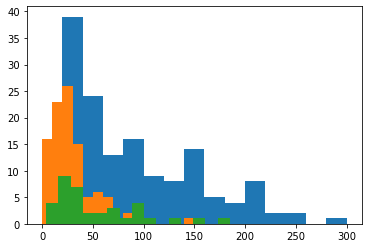

In [51]:
Movies[Movies.Genre =='Drama'].BudgetMillion
plt.hist(Movies[Movies.Genre =='Action'].BudgetMillion, bins =15)
plt.hist(Movies[Movies.Genre =='Drama'].BudgetMillion, bins =15)
plt.hist(Movies[Movies.Genre =='Thriller'].BudgetMillion, bins =15)
plt.show()

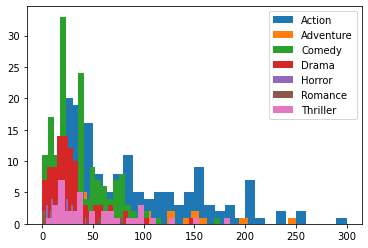

In [60]:
for gen in Movies.Genre.cat.categories:
    #print(gen)
    plt.hist(Movies[Movies.Genre ==gen].BudgetMillion, bins =30, stacked=True, label=gen)

plt.legend()
plt.show()

#use list to append and then create
    

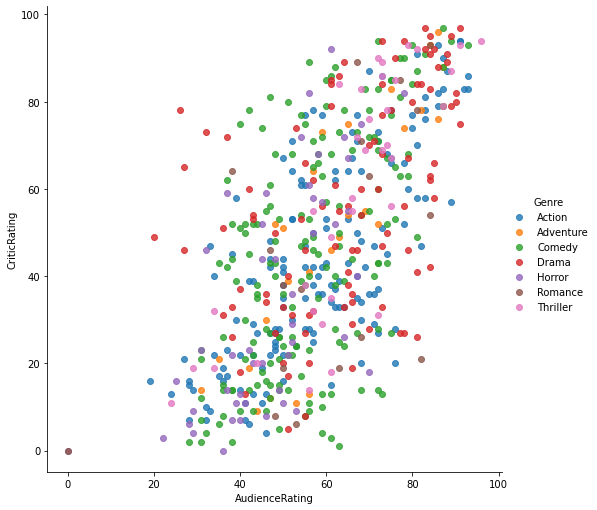

In [66]:
#KDE Plot = Kernel Density estimate
vis1 = sns.lmplot(data =Movies, x ='AudienceRating', y='CriticRating', hue='Genre', fit_reg=False, height =7)

C:\Users\697299\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\697299\Anaconda3\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


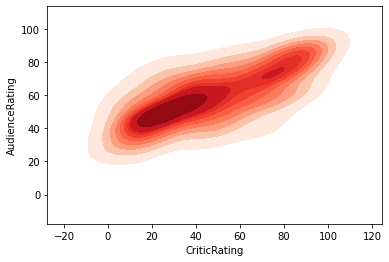

In [75]:
k1 = sns.kdeplot(Movies.CriticRating, Movies.AudienceRating, shade = True, shade_lowest=False, cmap ='Reds')

#k2 = sns.kdeplot(Movies.CriticRating, Movies.AudienceRating, cmap ='Reds')

In [80]:

import warnings
warnings.filterwarnings('ignore')

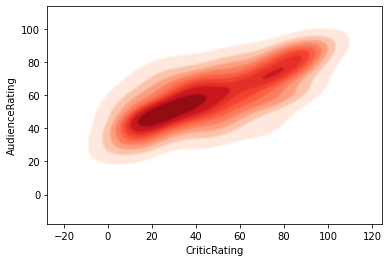

In [81]:
k1 = sns.kdeplot(Movies.CriticRating, Movies.AudienceRating, shade = True, shade_lowest=False, cmap ='Reds')

k2 = sns.kdeplot(Movies.CriticRating, Movies.AudienceRating, cmap ='Reds')

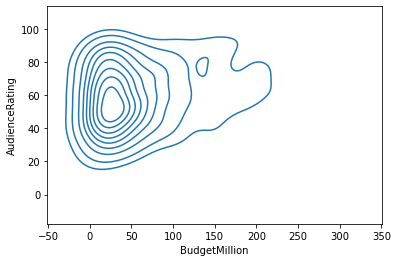

In [85]:
k3 = sns.kdeplot(Movies.BudgetMillion, Movies.AudienceRating)

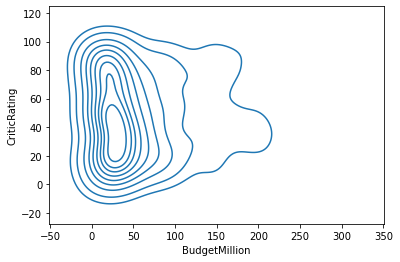

In [86]:
k3 = sns.kdeplot(Movies.BudgetMillion, Movies.CriticRating)

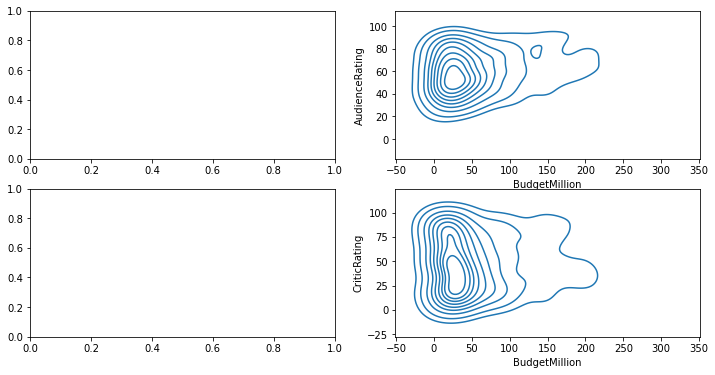

In [96]:
f, axes = plt.subplots(2,2, figsize=(12,6))
k3 = sns.kdeplot(Movies.BudgetMillion, Movies.AudienceRating, ax = axes[0,1])
k4 = sns.kdeplot(Movies.BudgetMillion, Movies.CriticRating, ax=axes[1,1])

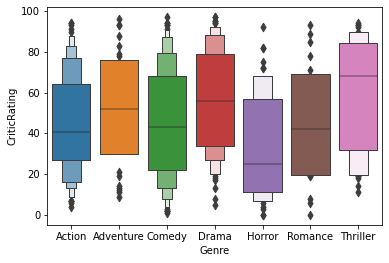

In [100]:
#Violin plots
W = sns.boxenplot(data = Movies, x = 'Genre', y='CriticRating')


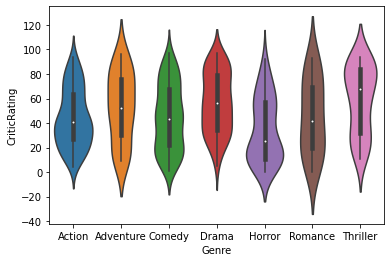

In [99]:
z = sns.violinplot(data = Movies, x = 'Genre', y='CriticRating')

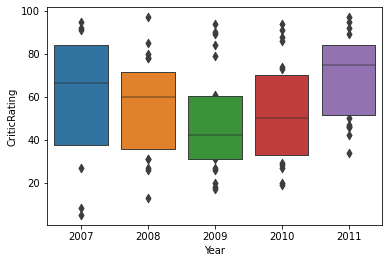

In [101]:
P = sns.boxenplot(data = Movies[Movies.Genre=='Drama'], x = 'Year', y='CriticRating')

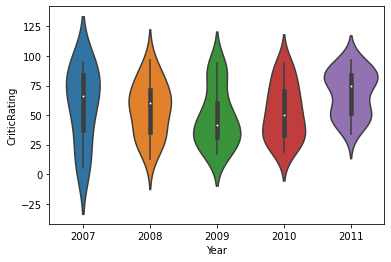

In [102]:
P = sns.violinplot(data = Movies[Movies.Genre=='Drama'], x = 'Year', y='CriticRating')

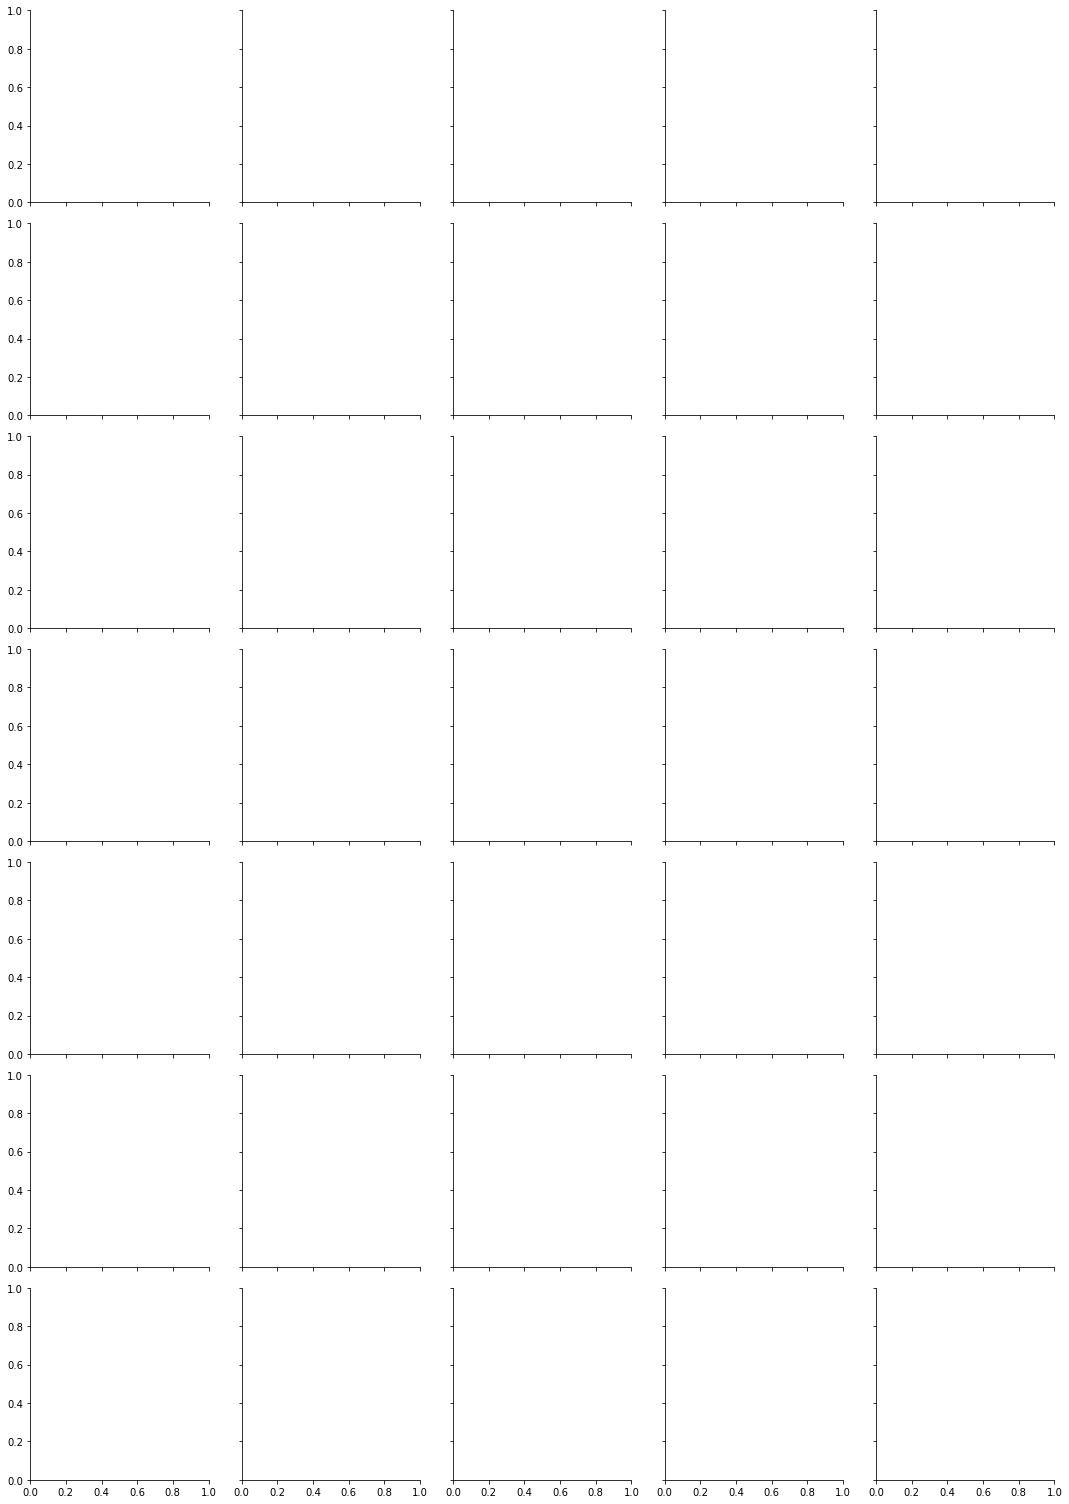

In [106]:
#Facets grid
#g = sns.FacetGrid(Movies, row='Genre', hue='Genre')
g = sns.FacetGrid(Movies, row='Genre', col ='Year', hue='Genre')

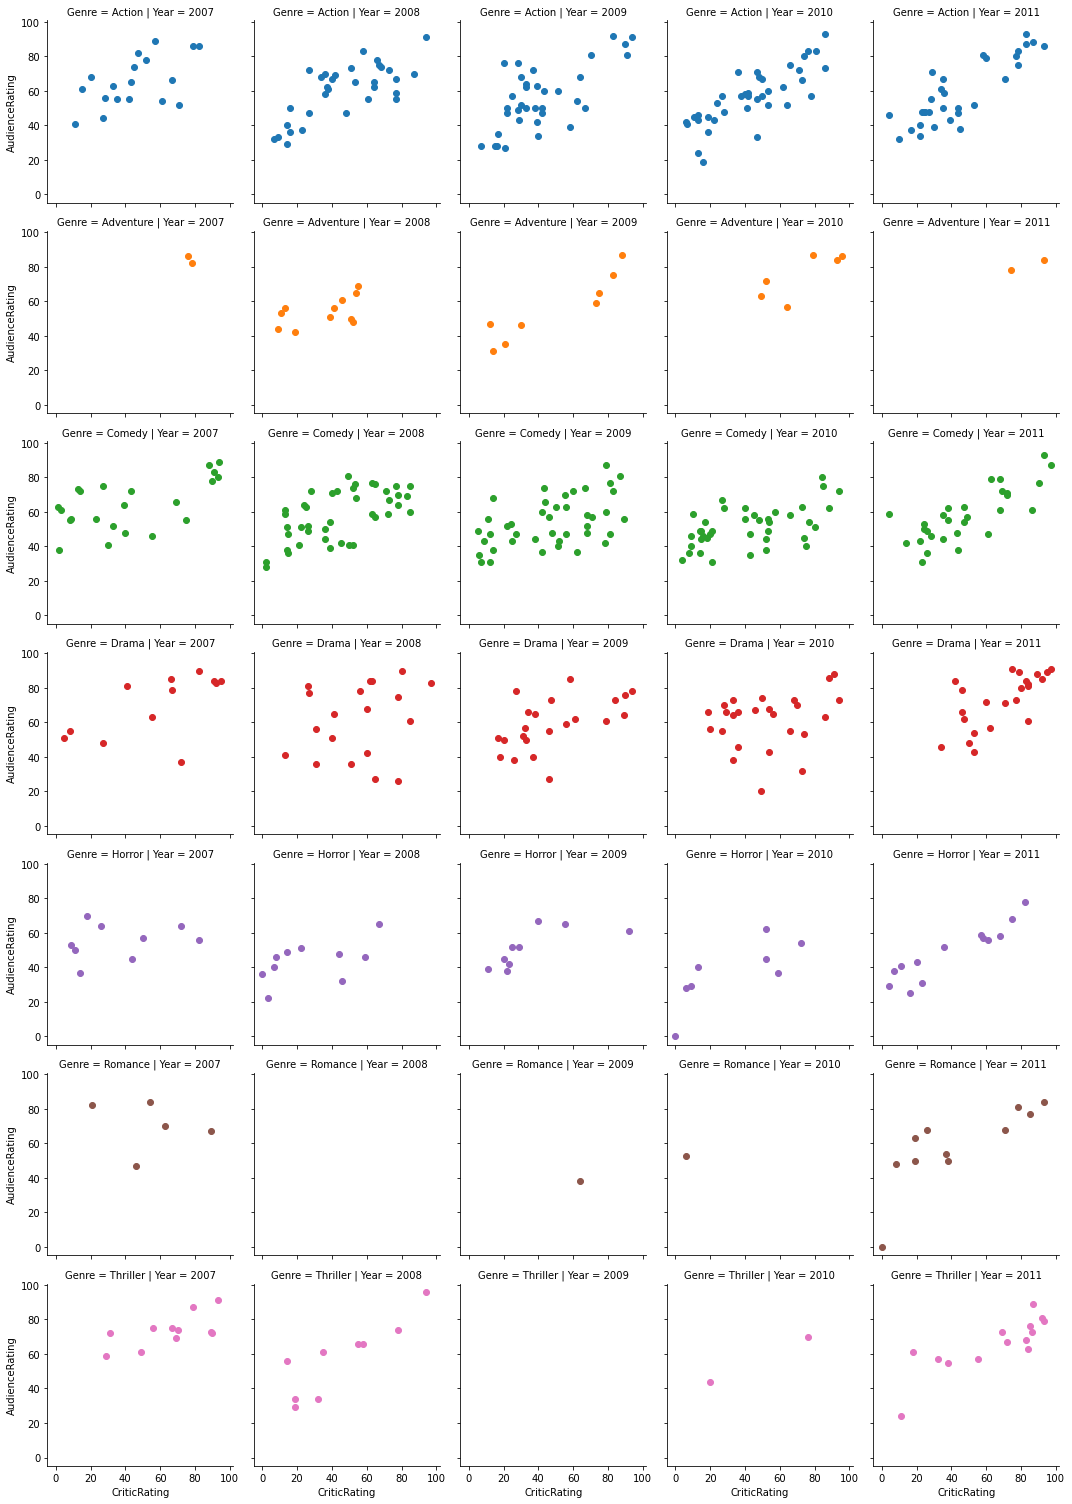

In [109]:
#plt.scatter(Movies.CriticRating, Movies.AudienceRating)
g = sns.FacetGrid(Movies, row='Genre', col ='Year', hue='Genre')
g= g.map(plt.scatter, 'CriticRating', 'AudienceRating')

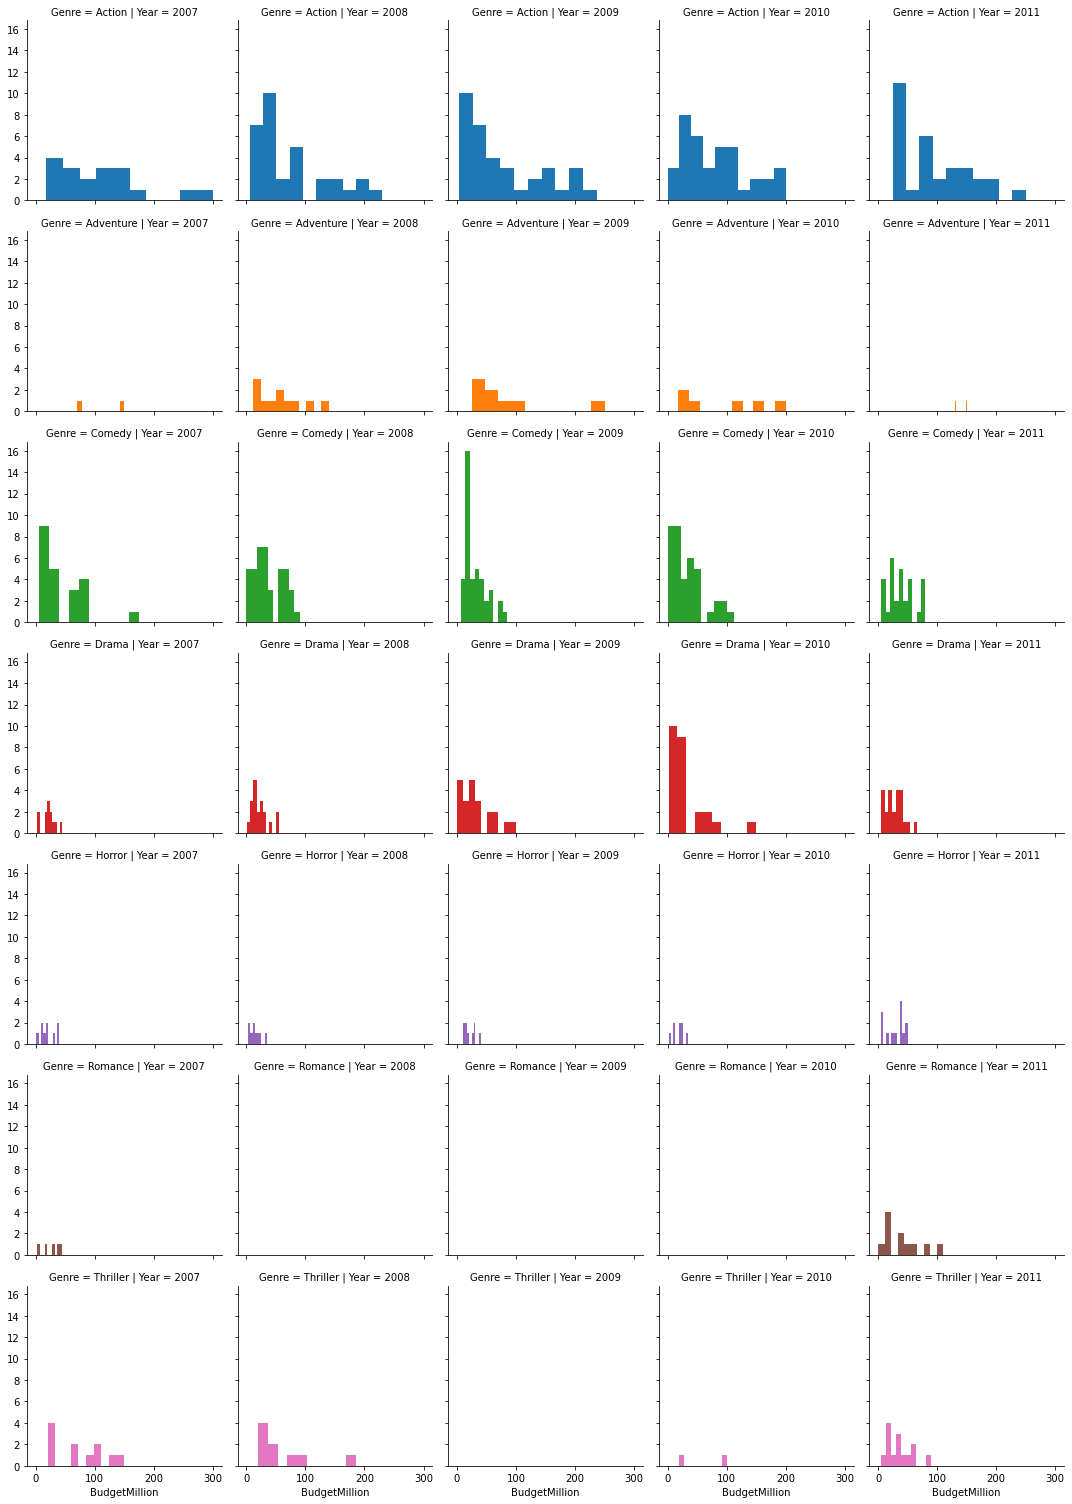

In [114]:
#can populate any chart
g = sns.FacetGrid(Movies, row='Genre', col ='Year', hue='Genre')
g= g.map(plt.hist,'BudgetMillion')

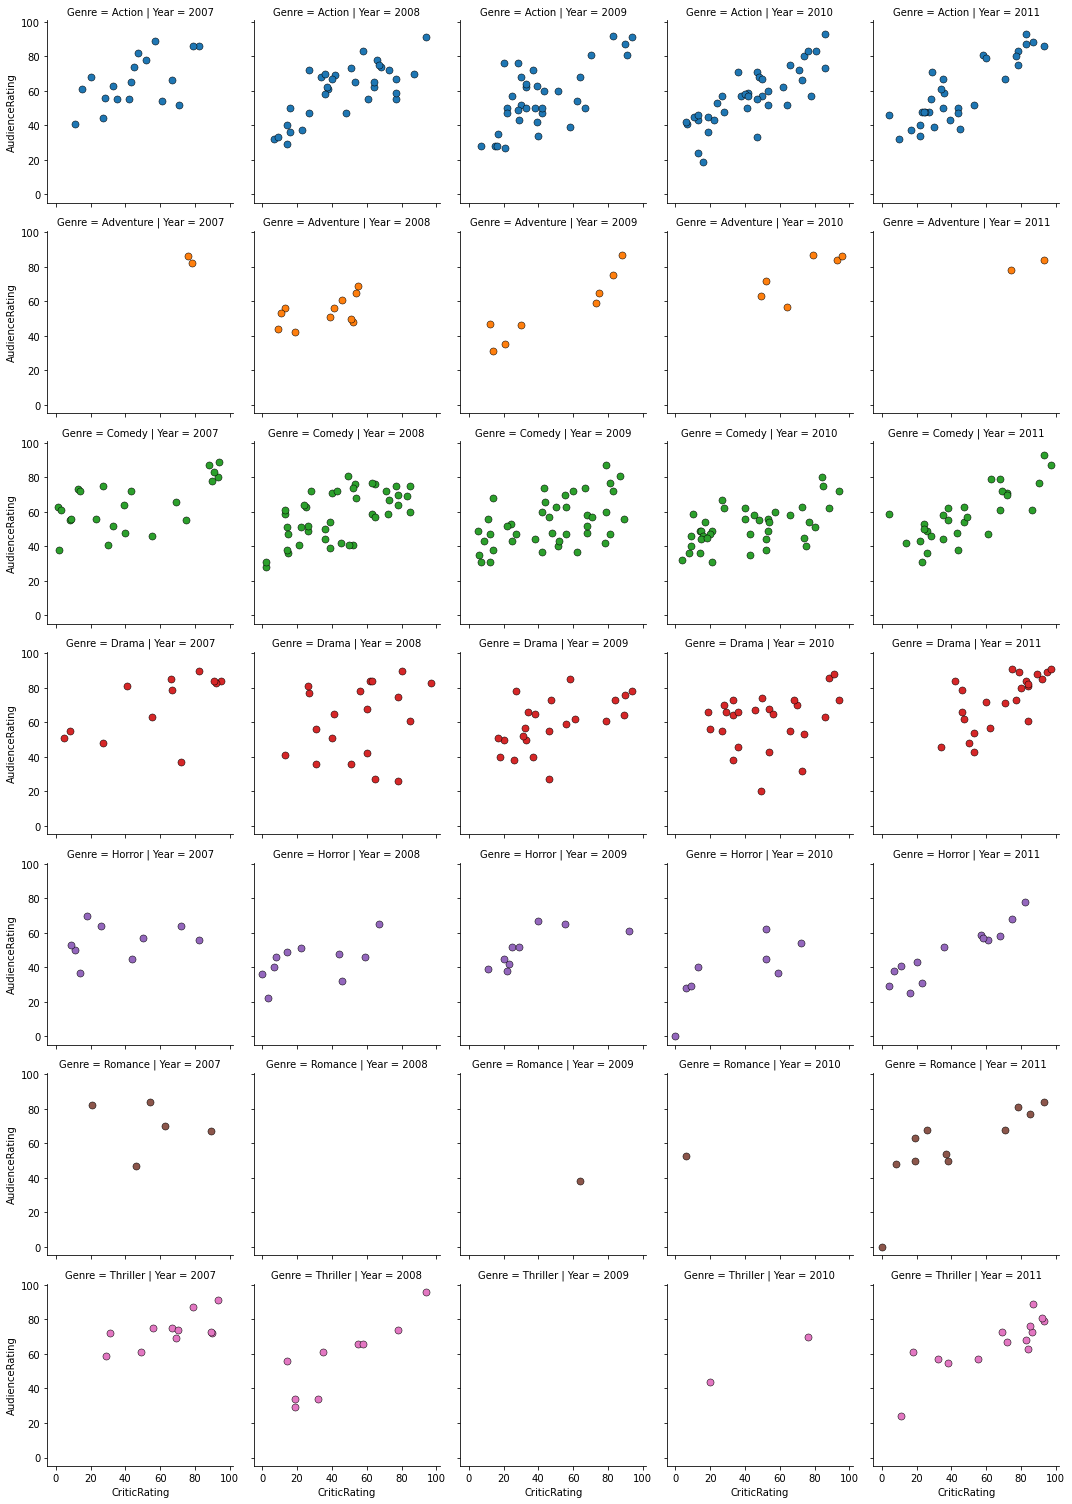

In [115]:
#plt.scatter(Movies.CriticRating, Movies.AudienceRating)
g = sns.FacetGrid(Movies, row='Genre', col ='Year', hue='Genre')
kws= dict(s=50,linewidth = 0.5, edgecolor ='black')
g= g.map(plt.scatter, 'CriticRating', 'AudienceRating', **kws)

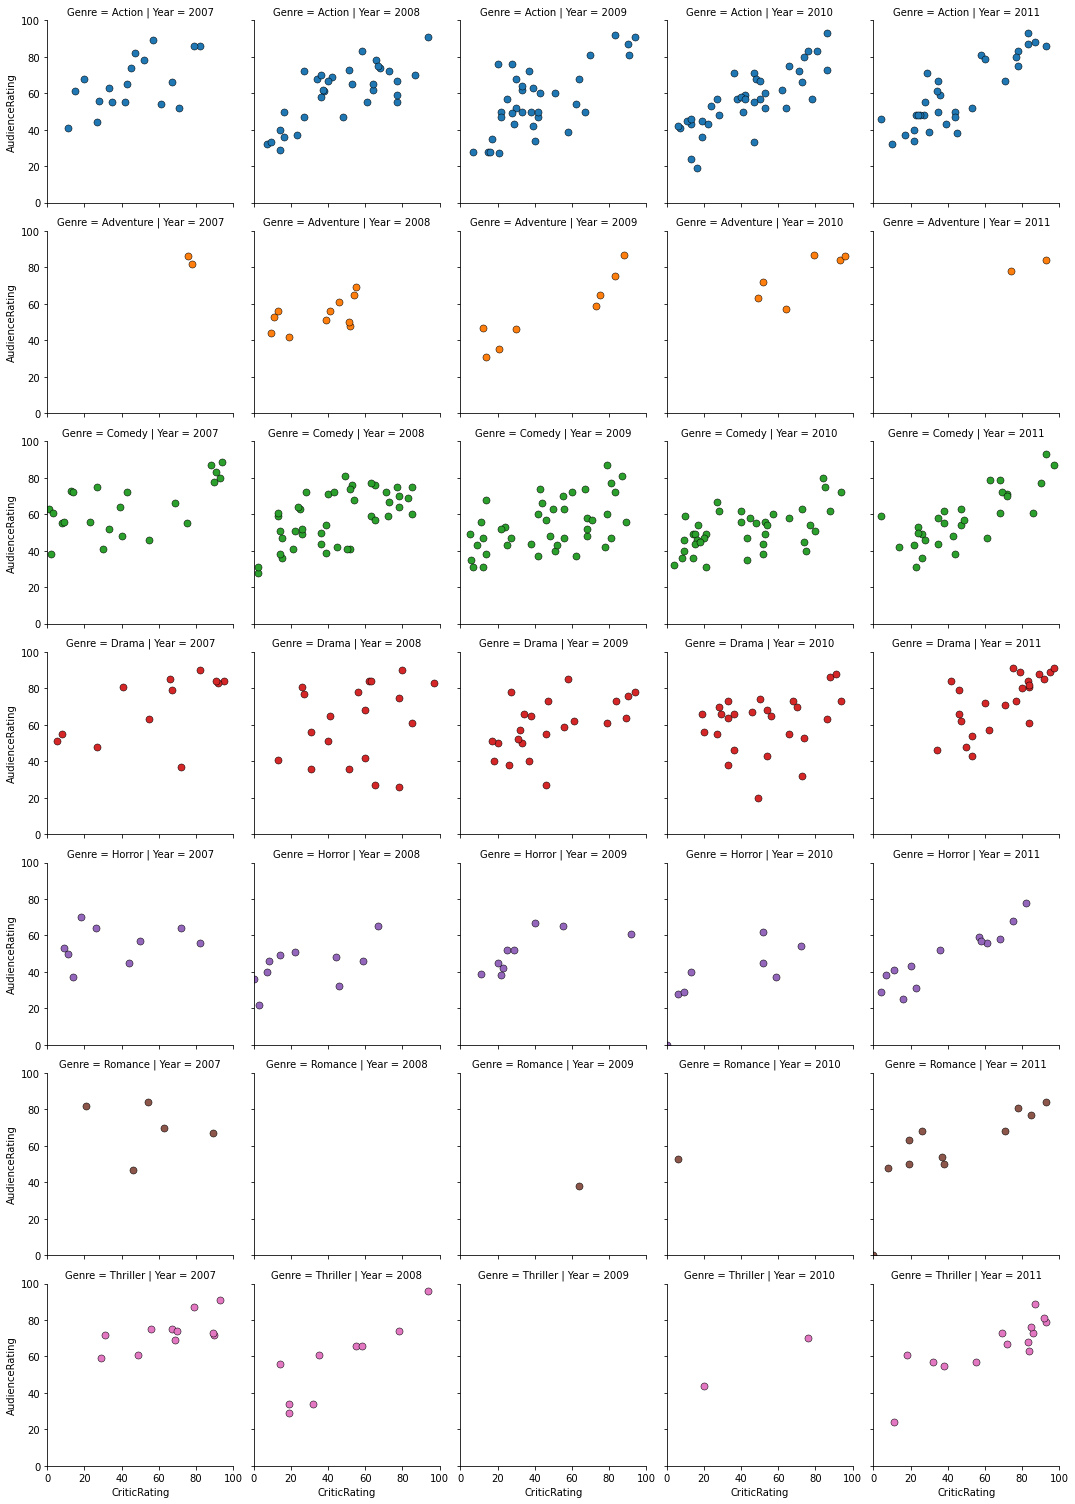

In [117]:
#Controlling axes and diagnol

g = sns.FacetGrid(Movies, row='Genre', col ='Year', hue='Genre')
kws= dict(s=50,linewidth = 0.5, edgecolor ='black')
g= g.map(plt.scatter, 'CriticRating', 'AudienceRating', **kws)
g.set(xlim=(0,100), ylim=(0,100))

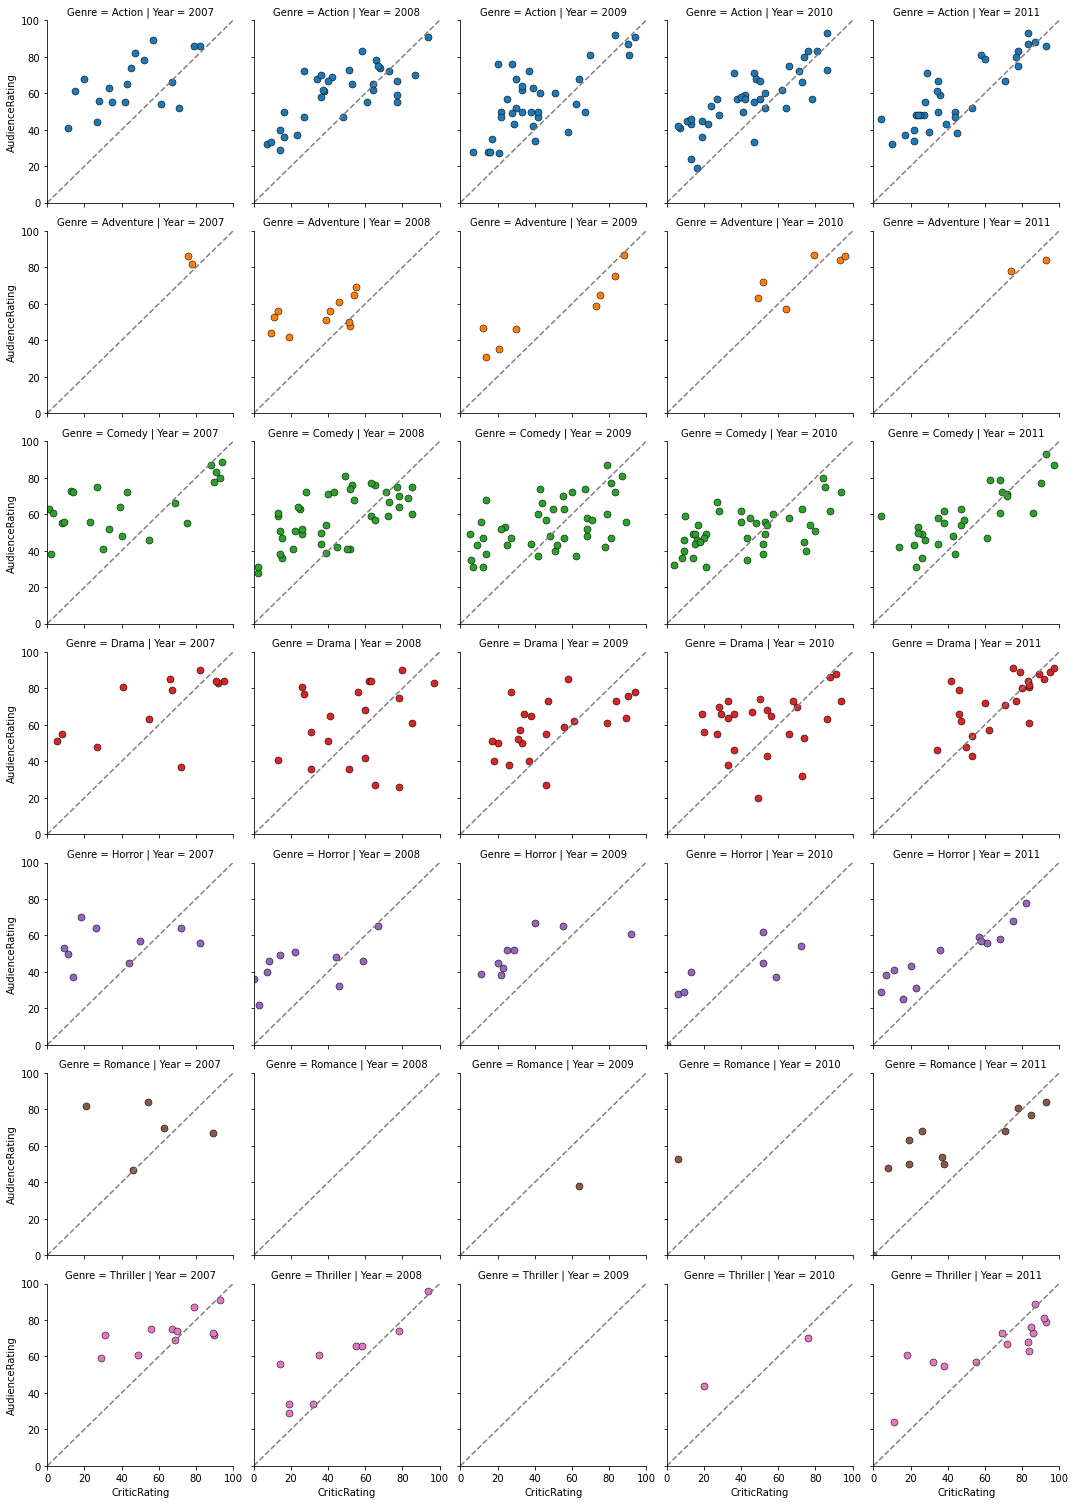

In [118]:
#Controlling axes and diagnol

g = sns.FacetGrid(Movies, row='Genre', col ='Year', hue='Genre')
kws= dict(s=50,linewidth = 0.5, edgecolor ='black')
g= g.map(plt.scatter, 'CriticRating', 'AudienceRating', **kws)
g.set(xlim=(0,100), ylim=(0,100))
for ax in g.axes.flat:
    ax.plot((0,100),(0,100), c="grey", ls='--')

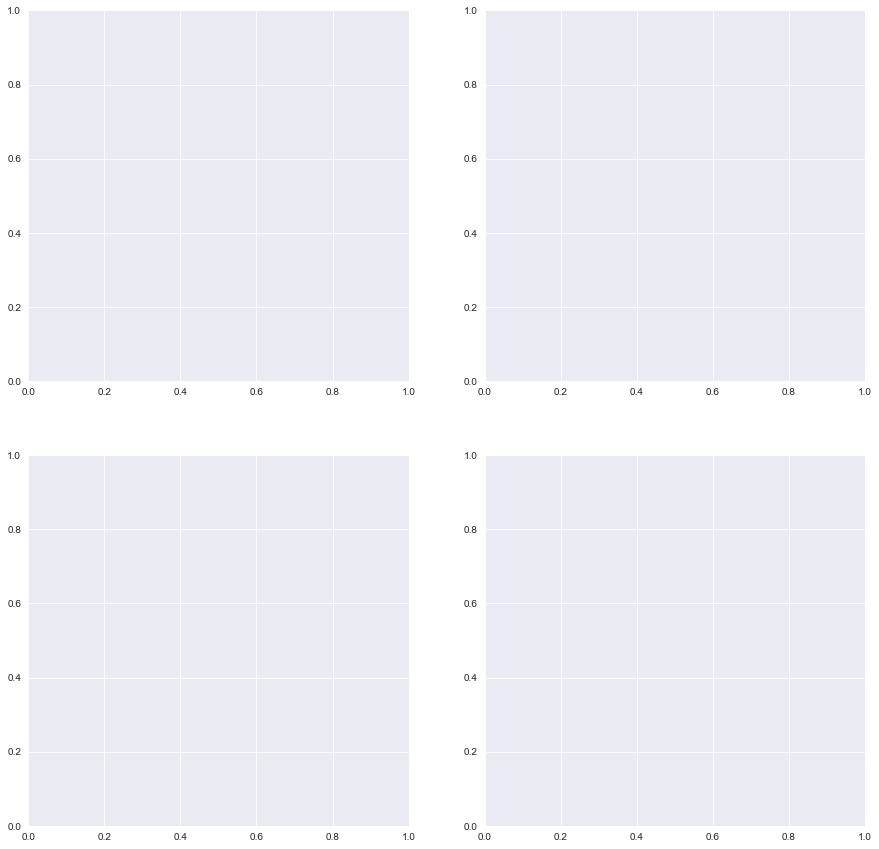

In [10]:
#Create Dashboard
sns.set_style('darkgrid')
f, axesv= plt.subplots(2,2, figsize=(15,15))